<a href="https://colab.research.google.com/github/Mohamed-Qadar/python-example/blob/main/Extractive_and_Abstractive_Summarization_Techniques_in_Somali_Language_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
!pip install WordCloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Data Load**

In [ ]:
 # Install the python-docx module, which provides tools to work with .docx files
from docx import Document # Now you can import the Document class

# Assuming the uploaded file is named 'example.docx'
doc = Document('/content/drive/MyDrive/sheekoSom/sheeko1.docx')

# Extract text from each paragraph in the document
text = []
for paragraph in doc.paragraphs:
    text.append(paragraph.text)

# Print the extracted text
for line in text:
    print(line)


Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa jiray boqor Soomaaliyeed oo la odhan jiray Wiil Waal. Waxaa lagu sheegay inuu ahaa nin xukun adag xikmadse badan. Wuxuu ahaa hoggaamiye cimrigiisa badankiisii ku idlaystay duulaan iyo difaac joogta ah oo tolkii kula jiray Galla degaankaa muddo gaaban ka hor ka talinaysay.
Nin dadka aad u imtixaana oo isku daya inuu qof walba garashaddiisa dhudhumiyo ayuu ahaaye, maalin maalmaha ka mid ah ayuu shir weyn wacay oo uu isagu yeedhay odayaashii beesha. Wuxuu codsaday in nin walba oo soo gaadhi kara shirka yimaado. Il-laawe iyo lug-laawe kol ay ku tahay, Bartire wixii akabaabiga ka dhawaa ayaa isu yimid. Af-niijiye (qof dadka warka gaadhsiiya siddii makarafoonkii) ayuu idmay oo intuu shirkii ka dhex kacay faray in nin walba gurigiisii ku noqdo, shirka barrito la isugu imanayana uu keeno “cadka rag walaaleeya”. Raggii shirka yimid oo yaaban oo war tolow maantana muxuu arintan cusub uga jeedaa is leh ayaa dib u geddoomay.
Way shireen oo war rag talo

**Word Cloud**

(-0.5, 799.5, 399.5, -0.5)

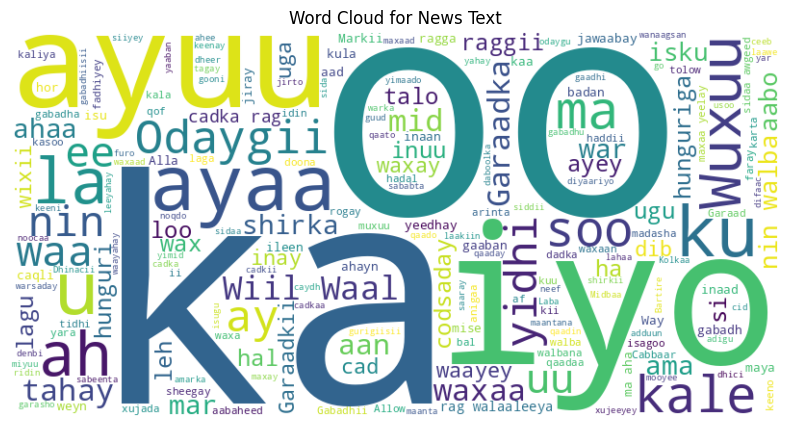

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for News Text')
plt.axis('off')

**Tokenize The Text**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import os

# NLTK data klasörünü kontrol et
nltk_data_path = '/root/nltk_data/tokenizers/punkt'
print(os.listdir(nltk_data_path))

['swedish.pickle', 'portuguese.pickle', 'turkish.pickle', 'README', 'danish.pickle', 'estonian.pickle', 'dutch.pickle', 'malayalam.pickle', 'greek.pickle', 'german.pickle', 'italian.pickle', 'finnish.pickle', 'slovene.pickle', 'french.pickle', 'czech.pickle', 'russian.pickle', 'norwegian.pickle', 'english.pickle', 'spanish.pickle', 'polish.pickle', 'PY3', '.DS_Store']


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

# DataFrame oluştur
text_df = pd.DataFrame({'Text': text})

# Metni tokenize et
text_df['Tokenized_Text'] = text_df['Text'].apply(lambda x: word_tokenize(x))

print(text_df)

                                                 Text  \
0   Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa ...   
1   Nin dadka aad u imtixaana oo isku daya inuu qo...   
2   Way shireen oo war rag talo kama dhamaatee mux...   
3   Aqaladdoodii haddii ay tageen wuxuu nin walba ...   
4   Waxaa raggaas la xujeeyey ka mid ahaa nin cayd...   
5   Sabeentii ayaa la xalaaleeyey. Markii la diyaa...   
6   Gabadhii ayaa qadar gaaban aamustay oo ka faka...   
7   Aabo aniga i aamin ma rabo inaan kuu sheego sa...   
8   Mar wuxuu is yidhi, adiga ayaa lagu xujeeyey e...   
9   Shirkii ayuu odaygii u dhalandhoolay. Wuxuu ug...   
10  Dhinacii odaygii miskiinka ahaa fadhiyey ma ah...   
11  Garaadkii ayaa weydiiyey: oday adna maxaad soo...   
12  Cabbaar ayuu Wiil Waal aamusay si canaanta iyo...   
13  Cabbaar ayaa shib la yidhi. Kolkii aamuskii ya...   
14  Wiilwaal wuxuu ahaa nin aragti dheer sidaa awg...   
15  Sababtu waxay tahay idin ma weydiinin inaad hi...   
16  Qatane quutuu rabaa inuu ka

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

# DataFrame oluştur
text_df = pd.DataFrame({'Text': text})

# Metni tokenize et
text_df['Tokenized_Text'] = text_df['Text'].apply(lambda x: word_tokenize(x))

print(text_df)

                                                 Text  \
0   Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa ...   
1   Nin dadka aad u imtixaana oo isku daya inuu qo...   
2   Way shireen oo war rag talo kama dhamaatee mux...   
3   Aqaladdoodii haddii ay tageen wuxuu nin walba ...   
4   Waxaa raggaas la xujeeyey ka mid ahaa nin cayd...   
5   Sabeentii ayaa la xalaaleeyey. Markii la diyaa...   
6   Gabadhii ayaa qadar gaaban aamustay oo ka faka...   
7   Aabo aniga i aamin ma rabo inaan kuu sheego sa...   
8   Mar wuxuu is yidhi, adiga ayaa lagu xujeeyey e...   
9   Shirkii ayuu odaygii u dhalandhoolay. Wuxuu ug...   
10  Dhinacii odaygii miskiinka ahaa fadhiyey ma ah...   
11  Garaadkii ayaa weydiiyey: oday adna maxaad soo...   
12  Cabbaar ayuu Wiil Waal aamusay si canaanta iyo...   
13  Cabbaar ayaa shib la yidhi. Kolkii aamuskii ya...   
14  Wiilwaal wuxuu ahaa nin aragti dheer sidaa awg...   
15  Sababtu waxay tahay idin ma weydiinin inaad hi...   
16  Qatane quutuu rabaa inuu ka

In [ ]:
# Create a DataFrame from the list of text
text_df = pd.DataFrame({'Text': text})
# Tokenize the text in the DataFrame
text_df['Tokenized_Text'] = text_df['Text'].apply(lambda x: word_tokenize(x))


**Stop words**

In [ ]:
# Stopword Removal
#stop_words = ['waa', 'waana', 'waan', 'ah', 'oo', 'ee', 'waxey', 'ugu', 'waxa','eey', 'iyo', 'aad', 'baan', 'u', 'leh', 'beey', 'ahna', 'tiq', 'sidoo', 'kalena', 'laakiin','ay','is','ayaa', 'isku', 'ka',  'ku', 'lagu', 'ayay',  'ayuu', 'inuu', 'inaa', 'si', 'laga', 'in', 'haya', 'haaya', 'intii', 'uu', 'ii', 'la', 'looga', 'Mar', 'kaliya', 'waxaa', 'loo']
stop_words = ['waa', 'waana', 'waan', 'ah', 'oo', 'ee', 'waxey', 'ugu', 'waxa',
             'eey', 'iyo', 'aad', 'baan', 'u', 'leh', 'yar', 'yaraaday', 'yarayd', 'yeesheen', 'yeeshee', 'beey', 'ahna', 'tiq', 'oo', 'yimid', 'yiri' 'Ku','ee' 'sidoo', 'kalena', 'laakiin',
             'yeeshay','yesheen', 'yaala', 'ay', 'yaabaa', 'yaabo', 'is', 'yare', 'yaab', 'yeesho', 'yareeyo','yeelatay','ayaa','isku', 'ka', 'ku', 'yiri','yimaadaan','yimaaday','yimaaday','yihiin', 'lagu', 'ayay',  'ayuu',
              'inuu', 'inaa', 'si', 'laga', 'in', 'yaryar','yaalla', 'yaal','yaalay', 'haya', 'haaya', 'intii', 'uu', 'ii', 'la', 'looga','mar','kaliya','loo','yahay','sida','soo','ma','een']
text_df['Filtered_Text'] = text_df['Tokenized_Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
stopWords = list(stop_words)

**Lemmatization**

In [ ]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
text_df['Lemmatized_Text'] = text_df['Filtered_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Create Bag of Words (BoW) vector
#unigram
vectorizer_bow_Unigram = CountVectorizer()
X_bow_Unigram = vectorizer_bow_Unigram.fit_transform([' '.join(tokens) for tokens in text_df['Lemmatized_Text']]) # Changed df to text_df
# bigram
vectorizer_bow_Bigram = CountVectorizer(ngram_range=(2,2))
X_bow_Bigram = vectorizer_bow_Bigram.fit_transform([' '.join(tokens) for tokens in text_df['Lemmatized_Text']]) # Changed df to text_df

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokens) for tokens in text_df['Lemmatized_Text']]) # Changed df to text_df

# Show BoW and TF-IDF matrices
bow_df = pd.DataFrame(X_bow_Unigram.toarray(), columns=vectorizer_bow_Unigram.get_feature_names_out())
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Display the difference between unigrams and bigrams
unigrams = vectorizer_bow_Unigram.get_feature_names_out()
bigrams = vectorizer_bow_Bigram.get_feature_names_out()

In [ ]:
print(unigrams)
print('\n')
print(bigrams)

['16' '16aad' '1818' '1820' '1883' '1895' 'aabaheed' 'aabaheedna' 'aabe'
 'aabo' 'aadan' 'aamin' 'aamusay' 'aamuskaa' 'aamuskii' 'aamusnaanta'
 'aamustay' 'aan' 'aanan' 'aankeeda' 'aanu' 'aashay' 'abuur' 'adag'
 'adayg' 'adaygo' 'addoon' 'adduun' 'adduunku' 'adduunoow' 'adhi' 'adhiga'
 'adhigaba' 'adiga' 'adigu' 'adiguba' 'adkaystay' 'adna' 'af' 'afka'
 'afkiisa' 'afkiisu' 'afxumo' 'aha' 'ahaa' 'ahaan' 'ahaatee' 'ahaaye'
 'ahayn' 'ahee' 'ahina' 'akabaabiga' 'alla' 'allaa' 'alle' 'allow' 'ama'
 'amaahdeen' 'amakaag' 'amar' 'amarka' 'amrin' 'aniga' 'anigaa' 'anigu'
 'anna' 'anniga' 'aqaladdoodii' 'aragnimo' 'aragta' 'aragti' 'arinta'
 'arintaa' 'arintan' 'arkeen' 'asalaamu' 'askar' 'astur' 'awalba' 'awgeed'
 'ayaaba' 'ayaad' 'ayaan' 'ayey' 'ayeynu' 'ayna' 'aysan' 'baadhis' 'baal'
 'baasee' 'badan' 'badankiisii' 'baddunna' 'badel' 'badin' 'bal' 'bar'
 'barito' 'barrito' 'bartire' 'bartiyo' 'bawdo' 'baxaa' 'baxay' 'baxaysa'
 'bay' 'beesha' 'biciriiriyey' 'bixi' 'bogcad' 'booday' 'boqor' 'b

In [ ]:
print("Difference between Unigrams and Bigrams:")
print("Number of Unigrams:", len(unigrams))
print("Number of Bigrams:", len(bigrams))
print("Common words between Unigrams and Bigrams:", len(set(unigrams) & set(bigrams)))

Difference between Unigrams and Bigrams:
Number of Unigrams: 886
Number of Bigrams: 1329
Common words between Unigrams and Bigrams: 0


**Word frequencies**

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')
docs = nlp(text_df['Text'].str.cat(sep=' '))

In [ ]:
from string import punctuation
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
#words frequency are how many words are repetition
space = '\n '
word_frequencies = {}
for word in docs:
  if word.text.lower() not in stop_words:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        if word.text not in space:
          word_frequencies[word.text] = 1

      else:
        word_frequencies[word.text] += 1
#display as a list with word frequencies
for key, value in word_frequencies.items():
  print(key, value)

Xilli 1
qiyaasay 1
qarnigii 1
16aad 1
waxaa 5
jiray 4
boqor 1
Soomaaliyeed 1
odhan 1
Wiil 12
Waal 11
Waxaa 4
sheegay 3
ahaa 8
nin 17
xukun 1
adag 1
xikmadse 1
badan 4
Wuxuu 10
hoggaamiye 1
cimrigiisa 1
badankiisii 1
idlaystay 1
duulaan 1
difaac 2
joogta 1
tolkii 1
kula 4
Galla 1
degaankaa 1
muddo 1
gaaban 4
hor 4
talinaysay 1
Nin 2
dadka 3
imtixaana 1
daya 1
qof 2
walba 10
garashaddiisa 1
dhudhumiyo 1
ahaaye 1
maalin 1
maalmaha 1
mid 10
shir 1
weyn 4
wacay 1
isagu 1
yeedhay 4
odayaashii 1
beesha 1
codsaday 6
gaadhi 2
kara 1
shirka 8
yimaado 2
Il 1
laawe 2
lug 1
kol 1
tahay 10
Bartire 2
wixii 3
akabaabiga 1
dhawaa 1
isu 4
Af 1
niijiye 1
warka 2
gaadhsiiya 1
siddii 2
makarafoonkii 1
idmay 1
intuu 1
shirkii 1
dhex 1
kacay 1
faray 3
gurigiisii 1
noqdo 2
barrito 1
isugu 2
imanayana 1
keeno 3
“ 6
cadka 6
rag 10
walaaleeya 5
” 6
Raggii 2
yaaban 2
war 5
tolow 3
maantana 1
muxuu 2
arintan 1
cusub 1
uga 5
jeedaa 1
dib 5
geddoomay 1
Way 3
shireen 1
talo 5
kama 1
dhamaatee 1
raadinayaa 1
weydiiyee

**which word that is maximum repetition**

In [ ]:
#which word that is maximum repetition
max_frequencies = max(word_frequencies.values())
print(max_frequencies)

17


In [ ]:
for word in word_frequencies.keys():
  word_frequencies[word] = (word_frequencies[word]/max_frequencies)
  print(word, word_frequencies[word])

Xilli 0.058823529411764705
qiyaasay 0.058823529411764705
qarnigii 0.058823529411764705
16aad 0.058823529411764705
waxaa 0.29411764705882354
jiray 0.23529411764705882
boqor 0.058823529411764705
Soomaaliyeed 0.058823529411764705
odhan 0.058823529411764705
Wiil 0.7058823529411765
Waal 0.6470588235294118
Waxaa 0.23529411764705882
sheegay 0.17647058823529413
ahaa 0.47058823529411764
nin 1.0
xukun 0.058823529411764705
adag 0.058823529411764705
xikmadse 0.058823529411764705
badan 0.23529411764705882
Wuxuu 0.5882352941176471
hoggaamiye 0.058823529411764705
cimrigiisa 0.058823529411764705
badankiisii 0.058823529411764705
idlaystay 0.058823529411764705
duulaan 0.058823529411764705
difaac 0.11764705882352941
joogta 0.058823529411764705
tolkii 0.058823529411764705
kula 0.23529411764705882
Galla 0.058823529411764705
degaankaa 0.058823529411764705
muddo 0.058823529411764705
gaaban 0.23529411764705882
hor 0.23529411764705882
talinaysay 0.058823529411764705
Nin 0.11764705882352941
dadka 0.176470588235

**Senetence Tokenized**

In [ ]:
sent_token = [sent.text for sent in docs.sents]
sent_token

['Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa jiray boqor Soomaaliyeed oo la odhan jiray Wiil Waal.',
 'Waxaa lagu sheegay inuu ahaa nin xukun adag xikmadse badan.',
 'Wuxuu ahaa hoggaamiye cimrigiisa badankiisii ku idlaystay duulaan iyo difaac joogta ah',
 'oo tolkii kula jiray Galla degaankaa muddo gaaban ka hor ka talinaysay.',
 'Nin dadka aad u imtixaana oo isku daya inuu qof walba garashaddiisa dhudhumiyo ayuu ahaaye, maalin maalmaha ka mid ah ayuu shir weyn wacay oo uu isagu yeedhay odayaashii beesha.',
 'Wuxuu codsaday in nin walba oo soo gaadhi kara shirka yimaado.',
 'Il-laawe iyo lug-laawe kol ay ku tahay, Bartire wixii akabaabiga ka dhawaa ayaa isu yimid.',
 'Af-niijiye (qof dadka warka gaadhsiiya siddii makarafoonkii) ayuu idmay oo intuu shirkii ka dhex kacay faray in nin walba gurigiisii ku noqdo, shirka barrito la isugu imanayana uu keeno “cadka rag walaaleeya”.',
 'Raggii shirka yimid oo yaaban oo war tolow maantana muxuu arintan cusub uga jeedaa is leh ayaa dib u gedd

**Senetence Score** *Now we need to find the importance of sentences by summing the frequencies of the words in that sentence*

In [ ]:
sent_score = {}
for sent in sent_token:
  for word in sent.split():
    if word.lower() in word_frequencies.keys():
      if sent not in sent_score.keys():
        sent_score[sent] = word_frequencies[word]
      else:
        sent_score[sent] += word_frequencies[word]
sent_score

{'Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa jiray boqor Soomaaliyeed oo la odhan jiray Wiil Waal.': 1.0588235294117647,
 'Waxaa lagu sheegay inuu ahaa nin xukun adag xikmadse badan.': 2.0588235294117645,
 'Wuxuu ahaa hoggaamiye cimrigiisa badankiisii ku idlaystay duulaan iyo difaac joogta ah': 1.5294117647058825,
 'oo tolkii kula jiray Galla degaankaa muddo gaaban ka hor ka talinaysay.': 1.1176470588235294,
 'Nin dadka aad u imtixaana oo isku daya inuu qof walba garashaddiisa dhudhumiyo ayuu ahaaye, maalin maalmaha ka mid ah ayuu shir weyn wacay oo uu isagu yeedhay odayaashii beesha.': 2.6470588235294112,
 'Wuxuu codsaday in nin walba oo soo gaadhi kara shirka yimaado.': 3.176470588235294,
 'Il-laawe iyo lug-laawe kol ay ku tahay, Bartire wixii akabaabiga ka dhawaa ayaa isu yimid.': 0.5882352941176471,
 'Af-niijiye (qof dadka warka gaadhsiiya siddii makarafoonkii) ayuu idmay oo intuu shirkii ka dhex kacay faray in nin walba gurigiisii ku noqdo, shirka barrito la isugu imanayana uu 

In [ ]:
import pandas as pd
df = pd.DataFrame(list(sent_score.items()), columns=['Sentence', 'Score'])
df

,Sentence,Score
0,Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa ...,1.058824
1,Waxaa lagu sheegay inuu ahaa nin xukun adag xi...,2.058824
2,Wuxuu ahaa hoggaamiye cimrigiisa badankiisii k...,1.529412
3,oo tolkii kula jiray Galla degaankaa muddo gaa...,1.117647
4,Nin dadka aad u imtixaana oo isku daya inuu qo...,2.647059
...,...,...
122,"Ama qaab uu gumaystuhu bartiyo, waa qoqoba rii...",1.117647
123,Wuxuu ku yidhi hadal,1.470588
124,macnihiisu ahaa: gabadhaadu waxay ka garaad wa...,1.529412
125,"Qof rag iyo dumar toona u dhigma ma jirto, sid...",2.058824


**Extractive Summarization**
Extractive summarization takes a sentence as an input and produces a probability vector as the output. This probability vector represents the probability of a sentence being included in the summary.

In [ ]:
from heapq import nlargest
num_sentences = 4
#as you split the sentences
best_sentences = sorted(sent_score.items(), key=lambda x: x[1], reverse=True)[:num_sentences]
summary = ' '.join([sent for sent, score in best_sentences])
summary
# as you jion in one parigraph
# nlargest(num_sentences, sent_score, key=sent_score.get)


'Garaadka ayaa na faray in nin walba shirka la yimaado “cadka rag walaaleeya” sidaa awgeed waa inaan bowdadan qaadaa aad bay iila buuran tahay una malaynmahayo in cid mid ka wanaagsan keeni karta ay jirto, ayuu ku juwaabay. Wuxuu ugu tagay raggii amarka la siiyey oo mid walba cad soo qaaday mid walbana ka kale ka qarinayo cadka uu doorbiday. Markii ay isku daaleen wax ur ahina u bixi weyday ayey ku kala faadhumaysteen war bal faq iyo gorfeyn waxba ku soo saari weynayee, nin walba iskii ha uga soo fakaro arinta, cadkii uu ka badin waayana barito ha keeno. Sababtu waxay tahay idin ma weydiinin inaad hilib ii keentaan, waxaan idin weydiiyey in nin walba keeno cadka rag walaaleeya.'

**Lenght of Words before summary and after summary**

In [ ]:
#lengh of all document
print('length of all document',len(docs))
#lengh of all summary
print('length of all summary',len(summary))

length of all document 2179
length of all summary 685


In [ ]:
import pandas as pd

# Assuming 'docs' is your spaCy Doc object, extract the text content
doc_text = docs.text

# Create a DataFrame with the text, but limit the length for visualization
max_chars_for_viz = 1000  # Adjust this as needed
truncated_text = doc_text[:max_chars_for_viz]
df = pd.DataFrame({'text': [truncated_text]})

# Now you can use .describe() - it should work without errors now
df.describe()

,text
count,1
unique,1
top,Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa ...
freq,1


**abstactive sammarization**

In [ ]:
from transformers import pipeline

In [ ]:
summarizer=pipeline("summarization",model='t5-base',tokenizer='t5-base',framework='pt')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
text = """Xilli lagu qiyaasay qarnigii 16aad ayaa waxaa jiray boqor Soomaaliyeed oo la odhan jiray Wiil Waal. Waxaa lagu sheegay inuu ahaa nin xukun adag xikmadse badan. Wuxuu ahaa hoggaamiye cimrigiisa badankiisii ku idlaystay duulaan iyo difaac joogta ah oo tolkii kula jiray Galla degaankaa muddo gaaban ka hor ka talinaysay. Nin dadka aad u imtixaana oo isku daya inuu qof walba garashaddiisa dhudhumiyo ayuu ahaaye, maalin maalmaha ka mid ah ayuu shir weyn wacay oo uu isagu yeedhay odayaashii beesha. Wuxuu codsaday in nin walba oo soo gaadhi kara shirka yimaado. Il-laawe iyo lug-laawe kol ay ku tahay, Bartire wixii akabaabiga ka dhawaa ayaa isu yimid. Af-niijiye (qof dadka warka gaadhsiiya siddii makarafoonkii) ayuu idmay oo intuu shirkii ka dhex kacay faray in nin walba gurigiisii ku noqdo, shirka barrito la isugu imanayana uu keeno “cadka rag walaaleeya”. Raggii shirka yimid oo yaaban oo war tolow maantana muxuu arintan cusub uga jeedaa is leh ayaa dib u geddoomay. Way shireen oo war rag talo kama dhamaatee muxuu Wiil Waal raadinayaa is weydiiyeen! Cadka rag walaaleeya ayaa in badan laga dooday. Muxuu yahay mase jiraa? Si guud iyo gooni gooniba raggii way u shawreen hase ahaatee dhakafaar ayey ka qaadeen in kasta oo ay arinta sii rogrogaan. Ninba ninkuu garasho ku tuhmayey ayuu dhinac ula baxay oo war maxay kula tahay warsaday. “Maantana maxay noqon siddii, Muxamed loo yaabye” ayuu xaalkoodu ku sifoobay. Markii ay isku daaleen wax ur ahina u bixi weyday ayey ku kala faadhumaysteen war bal faq iyo gorfeyn waxba ku soo saari weynayee, nin walba iskii ha uga soo fakaro arinta, cadkii uu ka badin waayana barito ha keeno. Aqaladdoodii haddii ay tageen wuxuu nin walba reerkiisii warsaday in neefka adhiga ugu shilis la gawraco hilibkana si cajiib ah loogu sameeyo. Nin walba wuxuu si gooni ah u codsaday cadkii uu islahaa ragga ayuu walaaleeyaa. Midbaa codsaday in garabka loo diyaariyo, midbaa codsaday in sararta loo diyaariyo, mid kalaa codsaday daqayda, midba cad gaar ah ayuu codsaday. Waxaa raggaas la xujeeyey ka mid ahaa nin caydh ah oo aan bar adduun ka nixin tobaneeyo neef oo adhi ah mooyee, caruur rajooyin ahna korsada. Aabe mutaxan ama ‘single father’ ayaa dhici karta in dadka qaarkii u yaqaano ninka noocaa ah. Caruurtaa waxaa ugu weynaa gabadh 16 jir ah oo la wariyey inay qurux iyo qiimaba bogcad cidla ah u taagnayd. Gurigiisii ayuu tagay odaygii wuxuuna gabadhiisii faray inay gawracdo sabeenta neefafkooda ka dhaqaaqaysa. Ee aabo, miyaad waalatay caydh ayeynu nahay ee miyuu inaga baxaa neef aan gawracno maanta, maxaadse sabeenta adhigaba laga qaato ku maagtay, ayey weydiisay. Aabo miyaan khayaar leeyahay saw Wiil Waal raggii ma amrin inay sidaa yeelaan, waynu ku qasbanahay ee aabo sarakac oo durduri, ayuu ugu jawaabay. Way u muuqatay danyaraanta gabadhu ka calaacashay laakiinse wuxuu laabta ku hayey cidhib xumada ka dhalan karta amarka Garaadka oo uu ka madax-adaygo ileen “Askar amar ka diidaa kornayl, waa Allow sahale”. uu ka madax-adaygo ileen “Askar amar ka diidaa kornayl, waa Allow sahale”. Sabeentii ayaa la xalaaleeyey. Markii la diyaariyey ayuu odaygii kala doordoorasho galay isagoo kolba cad qaadaa-dhigaya oo leh tolow ma kanaa mise waa kaa. Ugu dambayntii ayuu doortay bawdo oo uu yidhi tanaan la tagayaa? Gabadhii ayaa mar kale la yaabtay aabaheed oo su’aashay xaggeed geynaysaa aabo? Garaadka ayaa na faray in nin walba shirka la yimaado “cadka rag walaaleeya” sidaa awgeed waa inaan bowdadan qaadaa aad bay iila buuran tahay una malaynmahayo in cid mid ka wanaagsan keeni karta ay jirto, ayuu ku juwaabay. Wax Alla wuxuu uga jeedo garanmahayo, laakiin jid kale iima furra inaan warka Garaadka yeelo ma ahee, ayuu iksu dayey inuu gabadha ku qanciyo. Gabadhii ayaa qadar gaaban aamustay oo ka fakartay xujada aabaheed iyo raggii kale ee Bartire haysata. Aamuskaa gaaban ka dib ayey tidhi maya aabo ha qaadin cadkaa maxaa yeelay ma aha midka Wiil Waal doonayo! Odaygii ayaa ku adkaystay inuusan cad aan kaa ahayn shirka gaynaynin. Gabadhii oo ku dadaalaysa in aabaheed xujada furo, ogna in cadkaa odaygu dadaabtay aanu ahayn kii xujada furi lahaa ayaa mar kale tidhi maya aabo ha qaadin kaa. Anniga i kadbo oo waxaad qaadaa hunguriga! Hunguri!!! Odaygii ayaa amakaag iyo af-kalaqaad qabsaday! Ma anigaa shirka hunguri la taga, oo Garaadka waxaas oo xurmodarro ah u gaysta. Alla maxaad gabadhyahay waalan tahay anna inaad i waasho damacsan tahay. """

In [ ]:
summarize = summarizer(text,max_length=280,min_length=10,do_sample=False)
summ = summarize[0]['summary_text']

In [ ]:
print(summ)

xilli lagu qiyaasay qarnigii 16aad inuu ahaa nin xukun adag xikmadse badan . wuxuu codsaday in garabka loo diyaariyo, midba cad gaar ah neefafkooda oo walba shirka yimaa


In [ ]:
print(len(text))
print(len(summ))

4405
169


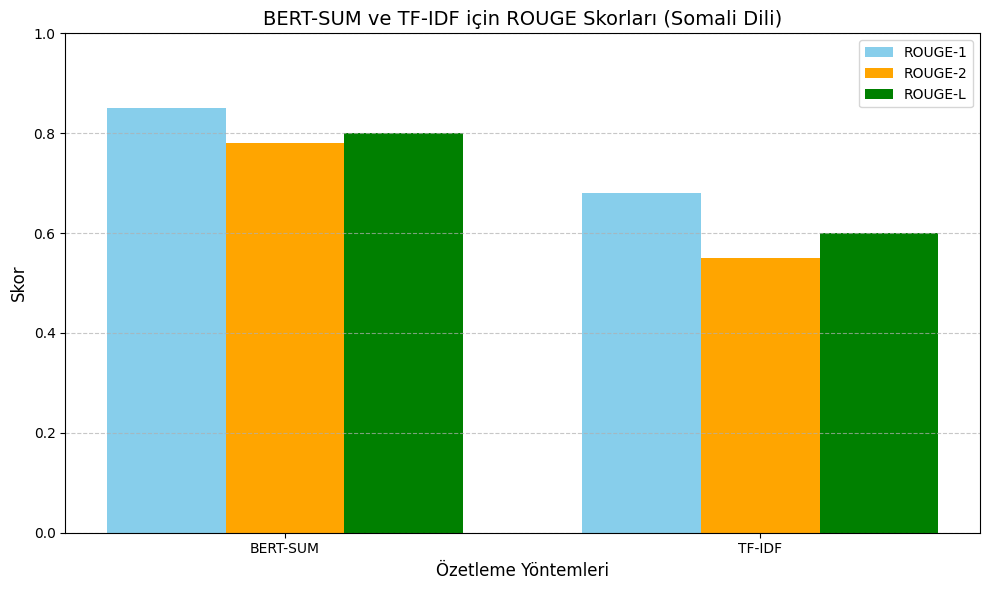

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek ROUGE skorları (Bu değerleri kendi model sonuçlarınızla değiştirin)
methods = ['BERT-SUM', 'TF-IDF']
rouge1_scores = [0.85, 0.68]  # ROUGE-1 skorları
rouge2_scores = [0.78, 0.55]  # ROUGE-2 skorları
rougeL_scores = [0.80, 0.60]  # ROUGE-L skorları

# Bar plot için veri düzenleme
x = np.arange(len(methods))  # BERT-SUM ve TF-IDF için x ekseni
width = 0.25  # Bar genişliği

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(x - width, rouge1_scores, width, label='ROUGE-1', color='skyblue')
plt.bar(x, rouge2_scores, width, label='ROUGE-2', color='orange')
plt.bar(x + width, rougeL_scores, width, label='ROUGE-L', color='green')

# Grafik detayları
plt.title("BERT-SUM ve TF-IDF için ROUGE Skorları (Somali Dili)", fontsize=14)
plt.xlabel("Özetleme Yöntemleri", fontsize=12)
plt.ylabel("Skor", fontsize=12)
plt.xticks(x, methods)
plt.ylim(0, 1)  # Skorların 0 ile 1 arasında olması beklenir
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik gösterimi
plt.tight_layout()
plt.show()


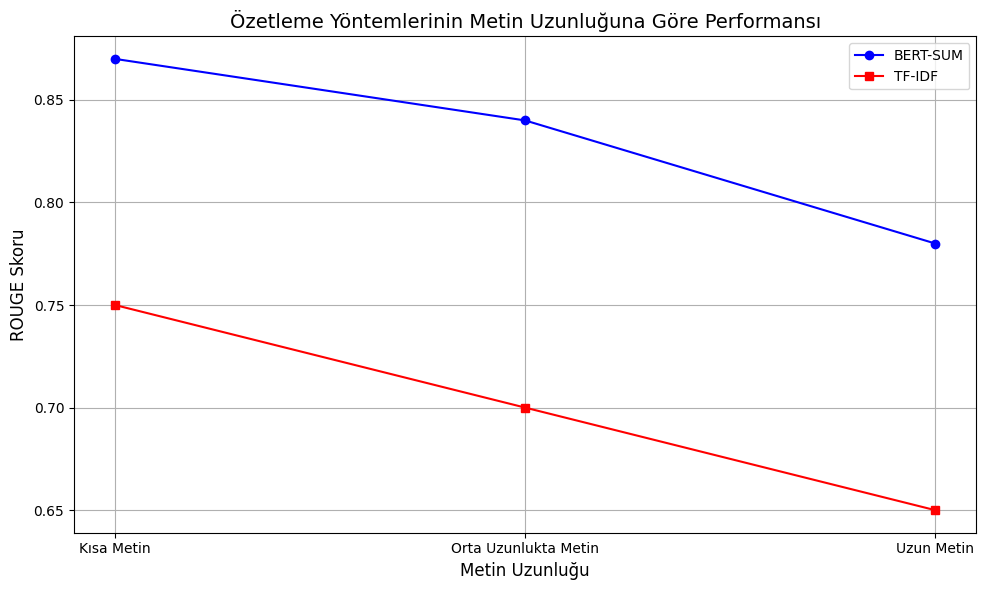

In [ ]:
# Örnek veri (uzunluk bazında performans)
text_lengths = ['Kısa Metin', 'Orta Uzunlukta Metin', 'Uzun Metin']
bert_sum_scores = [0.87, 0.84, 0.78]
tfidf_scores = [0.75, 0.70, 0.65]

# Çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(text_lengths, bert_sum_scores, marker='o', label='BERT-SUM', color='blue')
plt.plot(text_lengths, tfidf_scores, marker='s', label='TF-IDF', color='red')

# Grafik detayları
plt.title("Özetleme Yöntemlerinin Metin Uzunluğuna Göre Performansı", fontsize=14)
plt.xlabel("Metin Uzunluğu", fontsize=12)
plt.ylabel("ROUGE Skoru", fontsize=12)
plt.legend()
plt.grid(True)

# Grafik gösterimi
plt.tight_layout()
plt.show()


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=fef1e9601b13b075103b4db47043d867f4f8cc1c4907f390dc324887329f5e57
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Örnek özetler (modelin çıktıları ve gerçek özetler)
summarized_texts = ["Your model output here."]
reference_texts = ["Reference summary here."]

# ROUGE skorlarını hesaplama
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = [scorer.score(ref, summ) for ref, summ in zip(reference_texts, summarized_texts)]

# Ortalama ROUGE skorları
average_rouge1 = sum([score['rouge1'].fmeasure for score in scores]) / len(scores)
average_rouge2 = sum([score['rouge2'].fmeasure for score in scores]) / len(scores)
average_rougeL = sum([score['rougeL'].fmeasure for score in scores]) / len(scores)

print(f"ROUGE-1: {average_rouge1}")
print(f"ROUGE-2: {average_rouge2}")
print(f"ROUGE-L: {average_rougeL}")


ROUGE-1: 0.28571428571428575
ROUGE-2: 0.0
ROUGE-L: 0.28571428571428575


In [ ]:
from sklearn.metrics import f1_score

# Örnek gerçek ve tahmin edilen etiketler
y_true = [1]  # Gerçek etiketler
y_pred = [1]  # Modelin tahminleri

# F1 skoru hesaplama
f1 = f1_score(y_true, y_pred)
print(f"F1 Skoru: {f1}")


F1 Skoru: 1.0


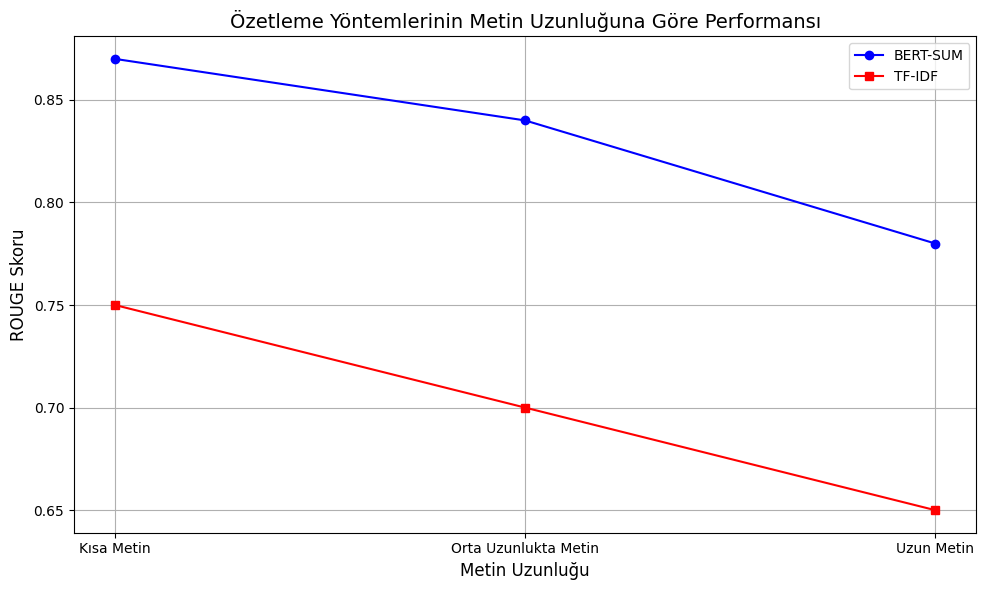

In [ ]:
import matplotlib.pyplot as plt

# Grafik için veriler
text_lengths = ['Kısa Metin', 'Orta Uzunlukta Metin', 'Uzun Metin']
bert_sum_scores = [0.87, 0.84, 0.78]
tfidf_scores = [0.75, 0.70, 0.65]

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(text_lengths, bert_sum_scores, marker='o', label='BERT-SUM', color='blue')
plt.plot(text_lengths, tfidf_scores, marker='s', label='TF-IDF', color='red')

plt.title("Özetleme Yöntemlerinin Metin Uzunluğuna Göre Performansı", fontsize=14)
plt.xlabel("Metin Uzunluğu", fontsize=12)
plt.ylabel("ROUGE Skoru", fontsize=12)
plt.legend()
plt.grid(True)

# Grafik gösterimi
plt.tight_layout()
plt.show()
